__Author: Christian Camilo Urcuqui López__ 

__Date: 4 January 2019__ 

The propose of this notebook is to complete the project proposed at <a href="https://www.udacity.com/facebook-pytorch-scholarship"> PyTorch Scholarship Challenge from Facebook </a>

# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [1]:
# Imports here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch 
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from PIL import Image
import matplotlib.image as mpimg
import cv2
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch import optim

These are the sections of the project:

+ [State of the Art](#State-of-the-art)
+ [Data preprocessing](#Data-preprocessing)
+ [Load the data](#Load-the-data)

# State of the art

In [2] was explored the application of CNN for fower classification. The NN has five convolutional layers followed by max-pooling layers, and three fully connected layers with a final 79-way softmax. Their approach achieves 84.02% classification accuracy. One of the problems that they mentioned is related with the _intra-class variation_ and _inter-class similarity_. They mentioned that the dataset provided by Oxford is not good to deal more general situations, for the last reason they proposed a new dataset with 63,442 flower images. During their research they proposed a new region-based detection method for flower classificatio baed on combination of aaliency map and luminance map. Their framework has some steps to preprocessing the images into the template used in database:
+ First, they crop out a maximum square patch from the resulting image generated by combining saliency map and luminance map, next, they down-sampled the images to a fixed resolution of 100, finally, they subtracted the mean RGB value, computed on the training set from each pixel.  
+ They explained that flowers have high brithness and for that reason they converted each pixel from RGB color space to YUV color space to obain luminance and yhe Y component determines the brigthness of the color.
The NN has the next architecture:
+ The first convolutional layer filters the 100 x 100 x 3 input image with 64 kernels size 5 x 3 x 2. The second, third convolutional layers have 128, 256 kernels of size 5 x 5 x 64, 3 x 3 x 128 connected to the (normalized, pooled) outputs. The fourth convolutional layer has 512 kernels of size 3 x 3 x 256, adn the fifth convolutional layer has 512 kernels of size 3 x 3 x 512.
+ The padding is 2 pixels for 5 x 5 convolutional layers and 1 pixel 3 x 3 convolutional layers
+ The pooling layers have a stride of 2 and a kernel_size of 3
+ The dropout has a rate of 0.5 and was used in the first two fully-connected layers.

[3] is explored the application of transfer learning with a VGG 16 and the application of transversal convolution layers, this works has an accuracy more than 90%. 


__References__

+ https://arxiv.org/ftp/arxiv/papers/1708/1708.03763.pdf
+ [2] Liu, Y., Tang, F., Zhou, D., Meng, Y., & Dong, W. (2016, November). Flower classification via convolutional neural network. In Functional-Structural Plant Growth Modeling, Simulation, Visualization and Applications (FSPMA), International Conference on (pp. 110-116). IEEE.
+ [3] Hiary, H., Saadeh, H., Saadeh, M., & Yaqub, M. (2018). Flower classification using deep convolutional neural networks. IET Computer Vision.

# Data preprocessing

According with the state of the art, I'm going to change each picture's colors to YUV in order to make the first experiment explained by [2]. The next code lines are goint to change all the pictue with other new files with the YUV property. 

In [76]:
import cv2
import glob, os, errno

for i in range(1,103):
    for fil in glob.glob("../../../Datasets/flower_data/valid/"+str(i)+"/*.jpg"):
        print(fil)
        image = cv2.imread(fil) 
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        cv2.imwrite(os.path.join(mydir+"2",fil),yuv) # write to location with same name

../../../Datasets/flower_data/valid/1\image_06739.jpg
../../../Datasets/flower_data/valid/1\image_06749.jpg
../../../Datasets/flower_data/valid/1\image_06755.jpg
../../../Datasets/flower_data/valid/1\image_06756.jpg
../../../Datasets/flower_data/valid/1\image_06758.jpg
../../../Datasets/flower_data/valid/1\image_06763.jpg
../../../Datasets/flower_data/valid/1\image_06765.jpg
../../../Datasets/flower_data/valid/1\image_06769.jpg
../../../Datasets/flower_data/valid/2\image_05094.jpg
../../../Datasets/flower_data/valid/2\image_05101.jpg
../../../Datasets/flower_data/valid/2\image_05124.jpg
../../../Datasets/flower_data/valid/2\image_05136.jpg
../../../Datasets/flower_data/valid/2\image_05137.jpg
../../../Datasets/flower_data/valid/2\image_05142.jpg
../../../Datasets/flower_data/valid/3\image_06621.jpg
../../../Datasets/flower_data/valid/3\image_06631.jpg
../../../Datasets/flower_data/valid/4\image_05638.jpg
../../../Datasets/flower_data/valid/4\image_05657.jpg
../../../Datasets/flower_dat

../../../Datasets/flower_data/valid/28\image_05272.jpg
../../../Datasets/flower_data/valid/29\image_04097.jpg
../../../Datasets/flower_data/valid/29\image_04099.jpg
../../../Datasets/flower_data/valid/29\image_04103.jpg
../../../Datasets/flower_data/valid/29\image_04104.jpg
../../../Datasets/flower_data/valid/29\image_04108.jpg
../../../Datasets/flower_data/valid/29\image_04116.jpg
../../../Datasets/flower_data/valid/29\image_04143.jpg
../../../Datasets/flower_data/valid/30\image_03464.jpg
../../../Datasets/flower_data/valid/30\image_03467.jpg
../../../Datasets/flower_data/valid/30\image_03469.jpg
../../../Datasets/flower_data/valid/30\image_03471.jpg
../../../Datasets/flower_data/valid/30\image_03475.jpg
../../../Datasets/flower_data/valid/30\image_03485.jpg
../../../Datasets/flower_data/valid/30\image_03487.jpg
../../../Datasets/flower_data/valid/30\image_03530.jpg
../../../Datasets/flower_data/valid/30\image_03531.jpg
../../../Datasets/flower_data/valid/30\image_03544.jpg
../../../D

../../../Datasets/flower_data/valid/50\image_06324.jpg
../../../Datasets/flower_data/valid/50\image_06331.jpg
../../../Datasets/flower_data/valid/50\image_06528.jpg
../../../Datasets/flower_data/valid/50\image_06534.jpg
../../../Datasets/flower_data/valid/50\image_06544.jpg
../../../Datasets/flower_data/valid/50\image_06550.jpg
../../../Datasets/flower_data/valid/50\image_06552.jpg
../../../Datasets/flower_data/valid/50\image_06558.jpg
../../../Datasets/flower_data/valid/50\image_06562.jpg
../../../Datasets/flower_data/valid/51\image_01315.jpg
../../../Datasets/flower_data/valid/51\image_01322.jpg
../../../Datasets/flower_data/valid/51\image_01326.jpg
../../../Datasets/flower_data/valid/51\image_01346.jpg
../../../Datasets/flower_data/valid/51\image_01352.jpg
../../../Datasets/flower_data/valid/51\image_01354.jpg
../../../Datasets/flower_data/valid/51\image_01363.jpg
../../../Datasets/flower_data/valid/51\image_01389.jpg
../../../Datasets/flower_data/valid/51\image_01391.jpg
../../../D

../../../Datasets/flower_data/valid/66\image_05559.jpg
../../../Datasets/flower_data/valid/66\image_05560.jpg
../../../Datasets/flower_data/valid/66\image_05563.jpg
../../../Datasets/flower_data/valid/66\image_05565.jpg
../../../Datasets/flower_data/valid/66\image_05577.jpg
../../../Datasets/flower_data/valid/66\image_05579.jpg
../../../Datasets/flower_data/valid/67\image_07075.jpg
../../../Datasets/flower_data/valid/67\image_07083.jpg
../../../Datasets/flower_data/valid/68\image_05904.jpg
../../../Datasets/flower_data/valid/68\image_05908.jpg
../../../Datasets/flower_data/valid/68\image_05915.jpg
../../../Datasets/flower_data/valid/68\image_05916.jpg
../../../Datasets/flower_data/valid/68\image_05919.jpg
../../../Datasets/flower_data/valid/68\image_05924.jpg
../../../Datasets/flower_data/valid/68\image_05926.jpg
../../../Datasets/flower_data/valid/68\image_05932.jpg
../../../Datasets/flower_data/valid/69\image_05958.jpg
../../../Datasets/flower_data/valid/69\image_05984.jpg
../../../D

../../../Datasets/flower_data/valid/81\image_00820.jpg
../../../Datasets/flower_data/valid/81\image_00848.jpg
../../../Datasets/flower_data/valid/81\image_00853.jpg
../../../Datasets/flower_data/valid/81\image_00859.jpg
../../../Datasets/flower_data/valid/81\image_00860.jpg
../../../Datasets/flower_data/valid/81\image_00863.jpg
../../../Datasets/flower_data/valid/81\image_00892.jpg
../../../Datasets/flower_data/valid/81\image_00893.jpg
../../../Datasets/flower_data/valid/81\image_00895.jpg
../../../Datasets/flower_data/valid/81\image_00896.jpg
../../../Datasets/flower_data/valid/81\image_00903.jpg
../../../Datasets/flower_data/valid/81\image_00904.jpg
../../../Datasets/flower_data/valid/81\image_00909.jpg
../../../Datasets/flower_data/valid/81\image_00914.jpg
../../../Datasets/flower_data/valid/81\image_00919.jpg
../../../Datasets/flower_data/valid/81\image_00920.jpg
../../../Datasets/flower_data/valid/82\image_01592.jpg
../../../Datasets/flower_data/valid/82\image_01596.jpg
../../../D

../../../Datasets/flower_data/valid/96\image_07656.jpg
../../../Datasets/flower_data/valid/96\image_07658.jpg
../../../Datasets/flower_data/valid/96\image_07662.jpg
../../../Datasets/flower_data/valid/96\image_07669.jpg
../../../Datasets/flower_data/valid/96\image_07670.jpg
../../../Datasets/flower_data/valid/96\image_07677.jpg
../../../Datasets/flower_data/valid/97\image_07697.jpg
../../../Datasets/flower_data/valid/97\image_07699.jpg
../../../Datasets/flower_data/valid/97\image_07718.jpg
../../../Datasets/flower_data/valid/97\image_07723.jpg
../../../Datasets/flower_data/valid/97\image_07727.jpg
../../../Datasets/flower_data/valid/97\image_07739.jpg
../../../Datasets/flower_data/valid/97\image_07745.jpg
../../../Datasets/flower_data/valid/98\image_07757.jpg
../../../Datasets/flower_data/valid/98\image_07764.jpg
../../../Datasets/flower_data/valid/98\image_07766.jpg
../../../Datasets/flower_data/valid/98\image_07769.jpg
../../../Datasets/flower_data/valid/98\image_07778.jpg
../../../D

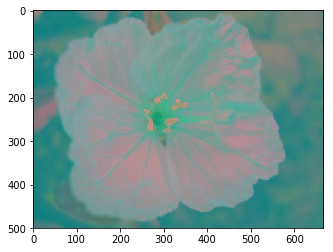

In [21]:
image = mpimg.imread('../../../Datasets/flower_data/train/1/image_06768.jpg')
yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
plt.imshow(yuv)

# Load the data

### Test for CUDA

In [2]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...



Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). You can [download the data here](https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip). The dataset is split into two parts, training and validation. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. If you use a pre-trained network, you'll also need to make sure the input data is resized to 224x224 pixels as required by the networks.

The validation set is used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks available from `torchvision` were trained on the ImageNet dataset where each color channel was normalized separately. For both sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.

In [18]:
data_dir = '../../../Datasets/flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In [19]:
# number of subprocess to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training setto use as validation0
valid_size = 0.1

# TODO: Define your transforms for the training and validation sets
train_transform = transforms.Compose([
    #transforms.ToPILImage(),
    transforms.Resize((224,224)),
    #transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    #transforms.FiveCrop(size=(50,50)),
    #transforms.RandomCrop(size=(50,50)),
    transforms.RandomRotation(20),
    #transforms.RandomAffine(10),
    #transforms.Lambda(lambda crops: torch.stack([ToTensor()(crop) for crop in crops]))
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
test_transform = transforms.Compose([
    #transforms.ToPILImage(),
    transforms.Resize((224,224)),
    #transforms.RandomHorizontalFlip(),
    #transforms.FiveCrop(size=(50,50)),
    #transforms.RandomCrop(size=(100,100)),
    #transforms.RandomRotation(10),    
    #transforms.Lambda(lambda crops: torch.stack([ToTensor()(crop) for crop in crops]))
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
# TODO: Load the datasets with ImageFolder
dataset_train = datasets.ImageFolder(train_dir, transform=train_transform) 
dataset_valid = datasets.ImageFolder(valid_dir, transform=test_transform)
# TODO: Using the image datasets and the trainforms, define the dataloaders

test_loader = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size)

torch.FloatTensor
torch.Size([3, 250, 250])


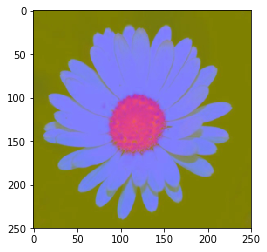

In [28]:
images, labels = next(iter(test_loader))
print(images[0].type())
print(images[0].shape)
imshow(images[0])

### Get the sets of train, valid and test


In [5]:
num_train = len(dataset_train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
print("training set: {}".format(len(train_loader)))
print("valid set: {}".format(len(valid_loader)))
print("test set: {}".format(len(test_loader)))

training set: 295
valid set: 33
test set: 41


### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [6]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

+ [Experiment 1](#Experiment-1)
+ [Experiment 2](#Experiment-2)
+ [Experiment 3](#Experiment-3)
+ [Experiment 4](#Experiment-4)

# Experiment 1

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! You can also ask questions on the forums or join the instructors in office hours.

Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

In [24]:
# TODO: Build and train your network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer - 64 kernels of size 5 x 3 x 3 
        self.conv1 = nn.Conv2d(3, 64, 3, padding=2)
        # convolutional layer - 128 kernels of size 5 x 5 x 64 
        self.conv2 = nn.Conv2d(64, 128, 3, padding=2)    
        # convolutional layer - 256 kernels of size 3 x 3 x 128 
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        # convolutional layer - 512 kernels of size 3 x 3 x 256 
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        # convolutional layer - 512 kernels of size 3 x 3 x 512 
        self.conv5 = nn.Conv2d(512, 512, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(3, 2)
        # Linear applications
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 340)
        self.fc3 = nn.Linear(340, 102)
        self.dropout = nn.Dropout(p=0.25)
    
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        # flatten image input        
        x = x.view(-1, 512 * 2 * 2)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        #x = F.log_softmax(self.fc3(x), dim=1)
        x = self.fc3(x)
        return x    
    
# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()    

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=340, bias=True)
  (fc3): Linear(in_features=340, out_features=102, bias=True)
  (dropout): Dropout(p=0.25)
)


In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
# number of epochs to train the model
n_epochs = 30 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_project.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 3.953577 	Validation Loss: 0.419746
Validation loss decreased (inf --> 0.419746).  Saving model ...
Epoch: 2 	Training Loss: 3.603772 	Validation Loss: 0.402214
Validation loss decreased (0.419746 --> 0.402214).  Saving model ...
Epoch: 3 	Training Loss: 3.447646 	Validation Loss: 0.373874
Validation loss decreased (0.402214 --> 0.373874).  Saving model ...
Epoch: 4 	Training Loss: 3.266326 	Validation Loss: 0.350672
Validation loss decreased (0.373874 --> 0.350672).  Saving model ...
Epoch: 5 	Training Loss: 3.065949 	Validation Loss: 0.347819
Validation loss decreased (0.350672 --> 0.347819).  Saving model ...
Epoch: 6 	Training Loss: 2.941339 	Validation Loss: 0.322301
Validation loss decreased (0.347819 --> 0.322301).  Saving model ...
Epoch: 7 	Training Loss: 2.789004 	Validation Loss: 0.328154
Epoch: 8 	Training Loss: 2.629424 	Validation Loss: 0.294573
Validation loss decreased (0.322301 --> 0.294573).  Saving model ...
Epoch: 9 	Training Loss: 2.490058 

## Test the Trained Network

In [27]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        try:
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except:
            pass
                
        #if i < len(target.data):           
        #    label = target.data[i]
        #    class_correct[label] += correct[i].item()
        #    class_total[label] += 1
        #else:                        

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(1,102):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            cat_to_name[str(i)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 2.963319

Test Accuracy of pink primrose: 25% ( 1/ 4)
Test Accuracy of hard-leaved pocket orchid: 100% ( 6/ 6)
Test Accuracy of canterbury bells: 20% ( 1/ 5)
Test Accuracy of sweet pea:  0% ( 0/ 6)
Test Accuracy of english marigold: 10% ( 1/10)
Test Accuracy of tiger lily:  0% ( 0/ 5)
Test Accuracy of moon orchid: 20% ( 1/ 5)
Test Accuracy of bird of paradise:  0% ( 0/ 1)
Test Accuracy of monkshood: 42% ( 3/ 7)
Test Accuracy of globe thistle:  0% ( 0/ 2)
Test Accuracy of snapdragon: 75% (12/16)
Test Accuracy of colt's foot: 18% ( 2/11)
Test Accuracy of king protea:  0% ( 0/ 4)
Test Accuracy of spear thistle: 83% ( 5/ 6)
Test Accuracy of yellow iris: 28% ( 2/ 7)
Test Accuracy of globe-flower: 100% ( 4/ 4)
Test Accuracy of purple coneflower: 12% ( 1/ 8)
Test Accuracy of peruvian lily: 50% ( 6/12)
Test Accuracy of balloon flower: 40% ( 2/ 5)
Test Accuracy of giant white arum lily: 50% ( 1/ 2)
Test Accuracy of fire lily:  0% ( 0/ 3)
Test Accuracy of pincushion flower:  0% ( 0/ 1

# Experiment 2
 

<p style='color:red'>As we can see the last experiment had interesting results, in order to improve them I'm going to modify the architecture.</p>

In [38]:
# TODO: Build and train your network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer - 64 kernels of size 5 x 3 x 3 
        self.conv1 = nn.Conv2d(3, 64, 3, padding=2)
        # convolutional layer - 128 kernels of size 5 x 5 x 64 
        self.conv2 = nn.Conv2d(64, 128, 3, padding=2)    
        # convolutional layer - 256 kernels of size 3 x 3 x 128 
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        # convolutional layer - 512 kernels of size 3 x 3 x 256 
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        # convolutional layer - 512 kernels of size 3 x 3 x 512 
        self.conv5 = nn.Conv2d(512, 512, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(3, 2)
        # Linear applications
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 340)
        self.fc3 = nn.Linear(340, 102)
        self.dropout = nn.Dropout(p=0.25)
    
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        # flatten image input        
        x = x.view(-1, 512 * 2 * 2)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        #x = F.log_softmax(self.fc3(x), dim=1)
        x = self.fc3(x)
        return x    
    
# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()    

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=340, bias=True)
  (fc3): Linear(in_features=340, out_features=102, bias=True)
  (dropout): Dropout(p=0.25)
)


In [39]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [40]:
# number of epochs to train the model
n_epochs = 80 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_project_2.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 3.990983 	Validation Loss: 0.410030
Validation loss decreased (inf --> 0.410030).  Saving model ...
Epoch: 2 	Training Loss: 3.674383 	Validation Loss: 0.391861
Validation loss decreased (0.410030 --> 0.391861).  Saving model ...
Epoch: 3 	Training Loss: 3.532631 	Validation Loss: 0.384937
Validation loss decreased (0.391861 --> 0.384937).  Saving model ...
Epoch: 4 	Training Loss: 3.408835 	Validation Loss: 0.365509
Validation loss decreased (0.384937 --> 0.365509).  Saving model ...
Epoch: 5 	Training Loss: 3.254329 	Validation Loss: 0.346790
Validation loss decreased (0.365509 --> 0.346790).  Saving model ...
Epoch: 6 	Training Loss: 3.096555 	Validation Loss: 0.327112
Validation loss decreased (0.346790 --> 0.327112).  Saving model ...
Epoch: 7 	Training Loss: 2.958278 	Validation Loss: 0.312497
Validation loss decreased (0.327112 --> 0.312497).  Saving model ...
Epoch: 8 	Training Loss: 2.820549 	Validation Loss: 0.312272
Validation loss decreased (0.31249

In [41]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        try:
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except:
            pass   

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(1,102):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            cat_to_name[str(i)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 2.324524

Test Accuracy of pink primrose: 75% ( 3/ 4)
Test Accuracy of hard-leaved pocket orchid: 83% ( 5/ 6)
Test Accuracy of canterbury bells:  0% ( 0/ 5)
Test Accuracy of sweet pea:  0% ( 0/ 6)
Test Accuracy of english marigold: 10% ( 1/10)
Test Accuracy of tiger lily:  0% ( 0/ 5)
Test Accuracy of moon orchid: 60% ( 3/ 5)
Test Accuracy of bird of paradise: 100% ( 1/ 1)
Test Accuracy of monkshood: 100% ( 7/ 7)
Test Accuracy of globe thistle: 50% ( 1/ 2)
Test Accuracy of snapdragon: 81% (13/16)
Test Accuracy of colt's foot: 36% ( 4/11)
Test Accuracy of king protea:  0% ( 0/ 4)
Test Accuracy of spear thistle: 100% ( 6/ 6)
Test Accuracy of yellow iris: 42% ( 3/ 7)
Test Accuracy of globe-flower: 100% ( 4/ 4)
Test Accuracy of purple coneflower: 62% ( 5/ 8)
Test Accuracy of peruvian lily: 58% ( 7/12)
Test Accuracy of balloon flower: 40% ( 2/ 5)
Test Accuracy of giant white arum lily: 100% ( 2/ 2)
Test Accuracy of fire lily: 33% ( 1/ 3)
Test Accuracy of pincushion flower:  0% ( 0

# Experiment 3

<p style='color: green'> I'm going to try a fully connected layer </p>

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer - 64 kernels of size 5 x 3 x 3 
        self.conv1 = nn.Conv2d(3, 64, 3, padding=2)
        # convolutional layer - 128 kernels of size 5 x 5 x 64 
        self.conv2 = nn.Conv2d(64, 128, 3, padding=2)    
        # convolutional layer - 256 kernels of size 3 x 3 x 128 
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        # convolutional layer - 512 kernels of size 3 x 3 x 256 
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        # convolutional layer - 512 kernels of size 3 x 3 x 512 
        self.conv5 = nn.Conv2d(512, 512, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(3, 2)
        
        self.deconv1 = nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, dilation=1, output_padding=1)
        self.bn1     = nn.BatchNorm2d(512)
        self.deconv2 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn2     = nn.BatchNorm2d(256)
        
        # Linear applications
        
        self.fc1 = nn.Linear(256 * 12 * 12, 510)
        self.fc2 = nn.Linear(510, 340)
        self.fc3 = nn.Linear(340, 102)
        self.dropout = nn.Dropout(p=0.25)
        self.relu    = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        
        x = self.bn1(F.relu(self.deconv1(x)))     # size=(N, 512, x.H/16, x.W/16)
        x = self.bn2(F.relu(self.deconv2(x)))  # size=(N, 256, x.H/8, x.W/8)
        
        x = x.view(-1, 256 * 12 * 12)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        #x = F.log_softmax(self.fc3(x), dim=1)
        x = self.fc3(x)
        return x    
    
# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()    

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (deconv1): ConvTranspose2d(512, 512, kernel_size=(3, 3), stride=(2, 2), output_padding=(1, 1))
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv2): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=36864, out_features=510, bias=True)
  (fc2): Linear(in_features=510, out_features=340, bias=True)
  (

In [33]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
# number of epochs to train the model
n_epochs = 30 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_project_2.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 4.111215 	Validation Loss: 0.452365
Validation loss decreased (inf --> 0.452365).  Saving model ...
Epoch: 2 	Training Loss: 4.011754 	Validation Loss: 0.438395
Validation loss decreased (0.452365 --> 0.438395).  Saving model ...
Epoch: 3 	Training Loss: 3.880589 	Validation Loss: 0.419968
Validation loss decreased (0.438395 --> 0.419968).  Saving model ...
Epoch: 4 	Training Loss: 3.763401 	Validation Loss: 0.407512
Validation loss decreased (0.419968 --> 0.407512).  Saving model ...
Epoch: 5 	Training Loss: 3.662557 	Validation Loss: 0.399950
Validation loss decreased (0.407512 --> 0.399950).  Saving model ...
Epoch: 6 	Training Loss: 3.565231 	Validation Loss: 0.395410
Validation loss decreased (0.399950 --> 0.395410).  Saving model ...
Epoch: 7 	Training Loss: 3.462448 	Validation Loss: 0.370330
Validation loss decreased (0.395410 --> 0.370330).  Saving model ...
Epoch: 8 	Training Loss: 3.371014 	Validation Loss: 0.369758
Validation loss decreased (0.37033

In [35]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        try:
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except:
            pass   

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(1,102):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            cat_to_name[str(i)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 2888.445618

Test Accuracy of pink primrose:  0% ( 0/ 4)
Test Accuracy of hard-leaved pocket orchid:  0% ( 0/ 6)
Test Accuracy of canterbury bells:  0% ( 0/ 5)
Test Accuracy of sweet pea:  0% ( 0/ 6)
Test Accuracy of english marigold:  0% ( 0/10)
Test Accuracy of tiger lily: 20% ( 1/ 5)
Test Accuracy of moon orchid:  0% ( 0/ 5)
Test Accuracy of bird of paradise:  0% ( 0/ 1)
Test Accuracy of monkshood:  0% ( 0/ 7)
Test Accuracy of globe thistle:  0% ( 0/ 2)
Test Accuracy of snapdragon: 18% ( 3/16)
Test Accuracy of colt's foot:  0% ( 0/11)
Test Accuracy of king protea:  0% ( 0/ 4)
Test Accuracy of spear thistle:  0% ( 0/ 6)
Test Accuracy of yellow iris:  0% ( 0/ 7)
Test Accuracy of globe-flower:  0% ( 0/ 4)
Test Accuracy of purple coneflower:  0% ( 0/ 8)
Test Accuracy of peruvian lily:  0% ( 0/12)
Test Accuracy of balloon flower:  0% ( 0/ 5)
Test Accuracy of giant white arum lily:  0% ( 0/ 2)
Test Accuracy of fire lily:  0% ( 0/ 3)
Test Accuracy of pincushion flower:  0% ( 0/ 

## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [ ]:
# TODO: Save the checkpoint 

## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [49]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

model.load_state_dict(torch.load('model_project.pt'))

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [ ]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [20]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [ ]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file

## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the validation accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [ ]:
# TODO: Display an image along with the top 5 classes

# Experiment 4

<p style='color: violet'> I'm going to apply transfer learning </p>

## Transfer Learning

According with the project's requeriments I'm going to explore the application of transfer learning with the next architectures: 
+ ResNet - 152



In [7]:
model = models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [8]:
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
#classifier = nn.Sequential(OrderedDict([
#                        ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False, return_indices=True)),
#                          ('unpool1', nn.MaxUnpool2d(kernel_size=2, stride=2)),
#                          ('deconv1', nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, dilation=1, output_padding=1)),
#                          ('bn1', nn.BatchNorm2d(512)),
#                          ('deconv2', nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, dilation=1, output_padding=1)),
#                          ('bn2', nn.BatchNorm2d(256)),
#                          ('deconv3', nn.ConvTranspose2d(256, 128, kernel_size=3, stride=8, dilation=1, output_padding=1)),
#                          ('bn3', nn.BatchNorm2d(128)),  
                          #('fc1', nn.Linear(512 * 3 * 3, 4096)),
                          #('relu', nn.ReLU()),
                          #('fc2', nn.Linear(4096, 102)),
#                          #('output', nn.LogSoftmax(dim=1))
#                          ]))
    
#model.features.add_module = classifier

classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 510)),
                          ('relu', nn.ReLU()),
                          ('dp', nn.Dropout(0.25)),
                          ('fc2', nn.Linear(510, 340)),
                          ('relu2', nn.ReLU()),
                          ('dp2', nn.Dropout(0.25)),
                          ('fc3', nn.Linear(340, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

#classifier = nn.Sequential(OrderedDict([
                          #('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False, return_indices=True)),
#                          ('unpool1', nn.MaxUnpool2d(kernel_size=2, stride=2)),
#                          ('deconv1', nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, dilation=1, output_padding=1)),
#                          ('bn1', nn.BatchNorm2d(512)),
#                          ('deconv2', nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, dilation=1, output_padding=1)),
#                          ('bn2', nn.BatchNorm2d(256)),
#                          ('deconv3', nn.ConvTranspose2d(256, 128, kernel_size=3, stride=8, dilation=1, output_padding=1)),
#                          ('bn3', nn.BatchNorm2d(128)),  
#                          ('fc1', nn.Linear(25088, 4096)),                            
#                          ('relu', nn.ReLU()),
#                          ('dp1', nn.Dropout(0.25)),
#                          ('fc2', nn.Linear(4096, 102)),
#                          ('output', nn.LogSoftmax(dim=1))
#                          ]))
                    
                    
model.classifier = classifier

In [9]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [11]:
epochs = 20
steps = 0
running_loss = 0
print_every = 5

criterion = nn.CrossEntropyLoss()
# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
#optimizer = optim.SGD(model.classifier.parameters(), lr=0.003)
valid_loss_min = np.Inf # track change in validation loss

model.cuda()


for epoch in range(epochs):
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    for inputs, labels in train_loader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.cuda(), labels.cuda()
        
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in valid_loader:
                    inputs, labels = inputs.cuda(), labels.cuda()
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    valid_loss += batch_loss.item()
                # calculate average losses
                train_loss = train_loss/len(train_loader.dataset)
                valid_loss = valid_loss/len(valid_loader.dataset)
                # print training/validation statistics 
                print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                    epoch, train_loss, valid_loss))

                # save model if validation loss has decreased
                if valid_loss <= valid_loss_min:
                    print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    valid_loss_min,
                    valid_loss))
                    torch.save(model.state_dict(), 'model_project_tr_2.pt')
                    valid_loss_min = valid_loss
            
            
            
            # Calculate accuracy
                    #ps = torch.exp(logps)
                    #top_p, top_class = ps.topk(1, dim=1)
                    #equals = top_class == labels.view(*top_class.shape)
                    #accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            #print(f"Epoch {epoch+1}/{epochs}.. "
            #      f"Train loss: {running_loss/print_every:.3f}.. "
            #      f"Test loss: {test_loss/len(test_loader):.3f}.. "
            #      f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            model.train()

Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.023828
Validation loss decreased (inf --> 0.023828).  Saving model ...
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.023128
Validation loss decreased (0.023828 --> 0.023128).  Saving model ...
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.022722
Validation loss decreased (0.023128 --> 0.022722).  Saving model ...
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.022703
Validation loss decreased (0.022722 --> 0.022703).  Saving model ...
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.022698
Validation loss decreased (0.022703 --> 0.022698).  Saving model ...
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.022587
Validation loss decreased (0.022698 --> 0.022587).  Saving model ...
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.022491
Validation loss decreased (0.022587 --> 0.022491).  Saving model ...
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 0.022489
Validation loss decreased (0.02249

Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.012059
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.012294
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.012231
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.012329
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011847
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011323
Validation loss decreased (0.011622 --> 0.011323).  Saving model ...
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011540
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011748
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011436
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011293
Validation loss decreased (0.011323 --> 0.011293).  Saving model ...
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011049
Validation loss decreased (0.011293 --> 0.011049).  Saving model ...
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011177
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 0.011080


Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008512
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008180
Validation loss decreased (0.008311 --> 0.008180).  Saving model ...
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008353
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008390
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008488
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008308
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.009066
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008719
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008616
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008835
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008734
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008416
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008615
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008209
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.008297
Epoch: 3 	Traini

Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007598
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007280
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007211
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007376
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007780
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007581
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007788
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007758
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007619
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007239
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007481
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007271
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007574
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007413
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007427
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 0.007307
Epoch: 5 	Training Loss:

Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006431
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006241
Validation loss decreased (0.006289 --> 0.006241).  Saving model ...
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006320
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006330
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006290
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006417
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006406
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006597
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006971
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.007054
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006662
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.007112
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.006779
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.007186
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 0.007255
Epoch: 7 	Traini

Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006410
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006251
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006824
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006691
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006638
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006122
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006166
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006365
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006372
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006152
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006358
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006487
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006380
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006225
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006353
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 0.006123
Epoch: 9 	Training Loss:

Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006271
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006048
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.005855
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.005999
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006178
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006063
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006389
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006219
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006111
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006542
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006413
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006602
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006164
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006209
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006482
Epoch: 11 	Training Loss: 0.000000 	Validation Loss: 0.006570
Epoch: 1

Epoch: 13 	Training Loss: 0.000000 	Validation Loss: 0.006361
Epoch: 13 	Training Loss: 0.000000 	Validation Loss: 0.006239
Epoch: 13 	Training Loss: 0.000000 	Validation Loss: 0.006068
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006315
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006291
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.005928
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006196
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006741
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006234
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006126
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006276
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006002
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.005986
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006332
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.005950
Epoch: 14 	Training Loss: 0.000000 	Validation Loss: 0.006664
Epoch: 1

Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006459
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006466
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006201
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006257
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.005764
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006337
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006660
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006216
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006302
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006117
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006134
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.005913
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006208
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006278
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006044
Epoch: 16 	Training Loss: 0.000000 	Validation Loss: 0.006259
Epoch: 1

KeyboardInterrupt: 

In [12]:
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        try:
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except:
            pass   

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(1,102):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            cat_to_name[str(i)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.094914

Test Accuracy of pink primrose: 50% ( 2/ 4)
Test Accuracy of hard-leaved pocket orchid: 83% ( 5/ 6)
Test Accuracy of canterbury bells: 20% ( 1/ 5)
Test Accuracy of sweet pea: 50% ( 3/ 6)
Test Accuracy of english marigold: 50% ( 5/10)
Test Accuracy of tiger lily: 100% ( 5/ 5)
Test Accuracy of moon orchid: 60% ( 3/ 5)
Test Accuracy of bird of paradise: 100% ( 1/ 1)
Test Accuracy of monkshood: 85% ( 6/ 7)
Test Accuracy of globe thistle:  0% ( 0/ 2)
Test Accuracy of snapdragon: 93% (15/16)
Test Accuracy of colt's foot: 18% ( 2/11)
Test Accuracy of king protea: 50% ( 2/ 4)
Test Accuracy of spear thistle: 100% ( 6/ 6)
Test Accuracy of yellow iris: 85% ( 6/ 7)
Test Accuracy of globe-flower: 50% ( 2/ 4)
Test Accuracy of purple coneflower: 62% ( 5/ 8)
Test Accuracy of peruvian lily: 91% (11/12)
Test Accuracy of balloon flower: 100% ( 5/ 5)
Test Accuracy of giant white arum lily: 100% ( 2/ 2)
Test Accuracy of fire lily: 100% ( 3/ 3)
Test Accuracy of pincushion flower: 100% (

In [14]:
torch.save(model.state_dict(), 'model_project_tr_2.pt')

In [22]:
model.cpu()
torch.save(model.state_dict(), 'project_tr_2.pt')

In [60]:
state_dict = torch.load('model_project_tr_2.pt')
print(state_dict.keys())
model.load_state_dict(state_dict)

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.fc1.weight', 'classifier.fc1.bias', 'classifier.fc2.weight', 'classifier.fc2.bias', 'classifier.fc3.weight', 'classifier.fc3.bias'])


In [15]:
data_dir = '../../../Datasets/flower_data_1'
valid_dir = data_dir + '/valid'

test_transform = transforms.Compose([
    #transforms.ToPILImage(),
    transforms.Resize((224,224)),
    #transforms.RandomHorizontalFlip(),
    #transforms.FiveCrop(size=(50,50)),
    #transforms.RandomCrop(size=(100,100)),
    #transforms.RandomRotation(10),    
    #transforms.Lambda(lambda crops: torch.stack([ToTensor()(crop) for crop in crops]))
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

dataset_valid = datasets.ImageFolder(valid_dir, transform=test_transform)
# TODO: Using the image datasets and the trainforms, define the dataloaders

test_loader = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size)

In [16]:
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        try:
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except:
            pass   

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(1,102):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            cat_to_name[str(i)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 7.539179

Test Accuracy of pink primrose: 50% ( 2/ 4)
Test Accuracy of hard-leaved pocket orchid:  0% ( 0/ 6)
Test Accuracy of canterbury bells:  0% ( 0/ 5)
Test Accuracy of sweet pea: 100% ( 6/ 6)
Test Accuracy of english marigold: 40% ( 4/10)
Test Accuracy of tiger lily:  0% ( 0/ 5)
Test Accuracy of moon orchid: 60% ( 3/ 5)
Test Accuracy of bird of paradise:  0% ( 0/ 1)
Test Accuracy of monkshood: 14% ( 1/ 7)
Test Accuracy of globe thistle:  0% ( 0/ 2)
Test Accuracy of snapdragon: 100% (16/16)
Test Accuracy of colt's foot:  9% ( 1/11)
Test Accuracy of king protea: 50% ( 2/ 4)
Test Accuracy of spear thistle: 100% ( 6/ 6)
Test Accuracy of yellow iris: 14% ( 1/ 7)
Test Accuracy of globe-flower: 75% ( 3/ 4)
Test Accuracy of purple coneflower:  0% ( 0/ 8)
Test Accuracy of peruvian lily: 66% ( 8/12)
Test Accuracy of balloon flower: 60% ( 3/ 5)
Test Accuracy of giant white arum lily: 50% ( 1/ 2)
Test Accuracy of fire lily:  0% ( 0/ 3)
Test Accuracy of pincushion flower:  0% ( 0/ 